# Spectrum 시각화

## 1. 데이터 불러오기

In [1]:
import os
import glob
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
"""
import glob
import os
import pandas as pd

# 1. spec_fits 폴더 내의 .fit 파일 목록 불러오기
fit_files = glob.glob('spec_fits/*.fit')

# 2. 파일 경로에서 파일명만 추출
file_names = [os.path.basename(file) for file in fit_files]

# 3. 파일명을 DataFrame으로 변환하여 CSV 파일로 저장
df = pd.DataFrame({'filename': file_names})
df.to_csv('spec_fits_file_names.csv', index=False)

print("파일명 CSV 저장 완료: spec_fits_file_names.csv")
"""

'\nimport glob\nimport os\nimport pandas as pd\n\n# 1. spec_fits 폴더 내의 .fit 파일 목록 불러오기\nfit_files = glob.glob(\'spec_fits/*.fit\')\n\n# 2. 파일 경로에서 파일명만 추출\nfile_names = [os.path.basename(file) for file in fit_files]\n\n# 3. 파일명을 DataFrame으로 변환하여 CSV 파일로 저장\ndf = pd.DataFrame({\'filename\': file_names})\ndf.to_csv(\'spec_fits_file_names.csv\', index=False)\n\nprint("파일명 CSV 저장 완료: spec_fits_file_names.csv")\n'

In [3]:
plt.rcParams['font.family'] = "NanumBarunGothic"
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# 1. spec_fits 폴더 내의 .fit 파일 목록 불러오기
fit_files = glob.glob('spec_fits/*.fit')

In [5]:
# 2. 각 FITS 파일의 1D 스펙트럼 데이터를 저장할 리스트 생성
spectrum_list = []
file_names = []  # 파일명을 저장할 리스트
for file in fit_files:
    with fits.open(file) as hdul:
        data = hdul[0].data
        if data is None:
            print(f"{file} 파일에 데이터가 없습니다.")
        else:
            spectrum_list.append(data)
            file_names.append(os.path.basename(file))

In [6]:
file_names = [os.path.splitext(name)[0] for name in file_names]

In [7]:
# 3. 결과를 저장할 디렉토리 생성 (존재하지 않으면)
output_dir = 'spec_graph'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [8]:
# 4. 각 스펙트럼 데이터를 matplotlib으로 그리고 png 파일로 저장
for spectrum, file_name in zip(spectrum_list, file_names):
    plt.figure(figsize=(10, 4))
    plt.plot(spectrum, lw=1.5)
    plt.xlabel('Pixel')
    plt.ylabel('Intensity')
    plt.title(f"{file_name} 스펙트럼")
    plt.grid(True)
    
    # 파일명에서 확장자를 제거하여 새로운 png 파일 이름 생성
    base_name = os.path.splitext(file_name)[0]
    output_path = os.path.join(output_dir, f"{base_name}.png")
    plt.savefig(output_path)
    plt.close()


## 2. Zero point 설정

### 2.1 Zero point 설정 후 그래프 생성

In [9]:
import glob
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# 1. 결과를 저장할 디렉토리 생성 (존재하지 않으면)
output_dir = 'spec_graph_zero_point'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 4. 각 스펙트럼 데이터에서 최대값(= zero point) 이후의 데이터만 추출하여 저장
for spectrum, file_name in zip(spectrum_list, file_names):
    # 데이터의 최대값 인덱스를 찾기 (zero point)
    max_idx = np.argmax(spectrum)
    # zero point부터 끝까지의 데이터를 추출
    spectrum_zero = spectrum[max_idx:]
    # x축은 새롭게 0부터 시작하는 인덱스 배열 생성
    x_axis = np.arange(len(spectrum_zero))
    
    plt.figure(figsize=(10, 4))
    plt.plot(x_axis, spectrum_zero, lw=1.5)
    plt.xlabel('Pixel')
    plt.ylabel('Intensity')
    plt.title(f"{file_name} 스펙트럼 (Zero point 적용)")
    plt.grid(True)
    
    # 파일명에서 확장자 제거 후 png 파일로 저장
    base_name = os.path.splitext(file_name)[0]
    output_path = os.path.join(output_dir, f"{base_name}.png")
    plt.savefig(output_path)
    plt.close()


### 2.2 X축 limit 설정

In [10]:
# 1. 각 스펙트럼 데이터에서 최대값(=zero point) 이후의 데이터만 추출
spectrum_zero_xlim = []
for spectrum in spectrum_list:
    max_idx = np.argmax(spectrum)  # 최대값 인덱스를 zero point로 사용
    spectrum_zero = spectrum[max_idx:]
    spectrum_zero_xlim.append(spectrum_zero)

# 2. 모든 그래프에 동일한 x축 범위를 사용하기 위해 최대 길이 계산
# max_length = max(len(s) for s in spectrum_zero_list)
max_length = 3000

# 3. 결과를 저장할 디렉토리 생성 (존재하지 않으면)
output_dir = 'spec_graph_zero_xlim'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 4. 각 스펙트럼 데이터를 matplotlib으로 그려 동일한 x축 범위로 png 파일 저장
for spectrum_zero, file_name in zip(spectrum_zero_xlim, file_names):
    plt.figure(figsize=(10, 4))
    # 각 스펙트럼의 x축은 zero point부터 시작하는 인덱스 배열
    x_axis = np.arange(len(spectrum_zero))
    plt.plot(x_axis, spectrum_zero, lw=0.8, color = 'tab:brown')
    plt.xlabel('Pixel')
    plt.ylabel('Intensity')
    plt.title(f"{file_name} 스펙트럼 (Zero point 적용)")
    plt.xlim(0, max_length)  # 모든 그래프의 x축 범위를 동일하게 설정
    plt.grid(False)
    
    # 파일명에서 확장자 제거 후 png 파일로 저장
    base_name = os.path.splitext(file_name)[0]
    output_path = os.path.join(output_dir, f"{base_name}.png")
    plt.savefig(output_path)
    plt.close()


## 3. 일률적 시각화 및 비교

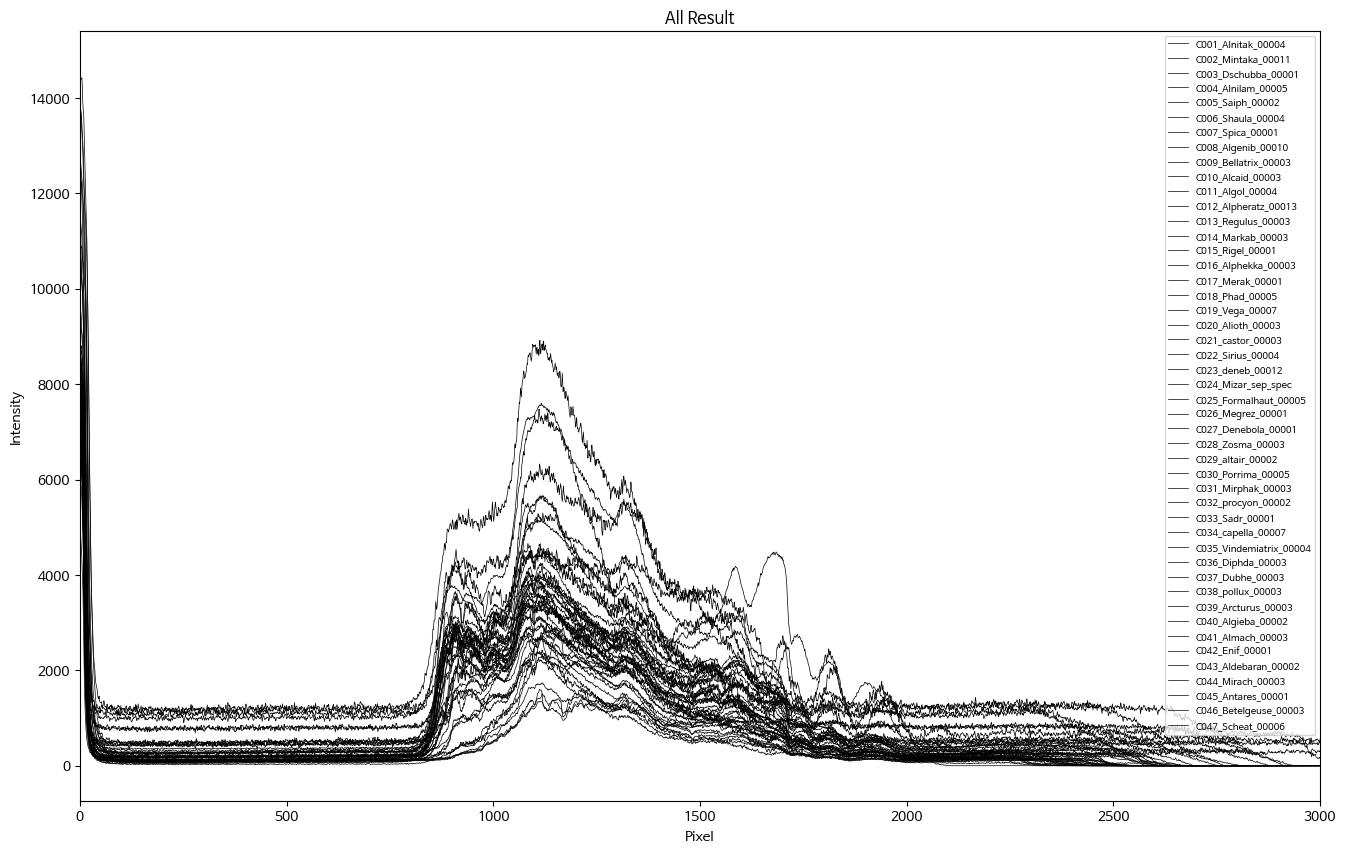

In [11]:
import glob
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# 1. spec_fits 폴더 내의 .fit 파일 목록 불러오기
fit_files = glob.glob('spec_fits/*.fit')

# 2. 각 FITS 파일의 1D 스펙트럼 데이터를 읽어와서, zero point 이후의 데이터를 저장
spectra = []
file_names = []
for file in fit_files:
    with fits.open(file) as hdul:
        data = hdul[0].data
        if data is None:
            print(f"{file} 파일에 데이터가 없습니다.")
        else:
            # 최대값 인덱스를 zero point로 사용
            max_idx = np.argmax(data)
            spec_zero = data[max_idx:]
            spectra.append(spec_zero)
            file_names.append(os.path.basename(file))

file_names = [os.path.splitext(name)[0] for name in file_names]

# 3. 모든 스펙트럼에 동일한 x축 범위를 사용하기 위해 최대 길이 계산
# max_length = max(len(spec) for spec in spectra)
max_length = 3000

# 4. 하나의 plot에 모든 스펙트럼 그리기 (line width = 0.5)
plt.figure(figsize=(16, 10))
for spec, name in zip(spectra, file_names):
    x_axis = np.arange(len(spec))  # zero point 기준 x축
    plt.plot(x_axis, spec, lw=0.5, color = "black" , label=name)
    

plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.title('All Result')
plt.xlim(0, max_length)
plt.grid(False)
plt.legend(fontsize='x-small')
plt.savefig('all_spectrum.png')
plt.show()


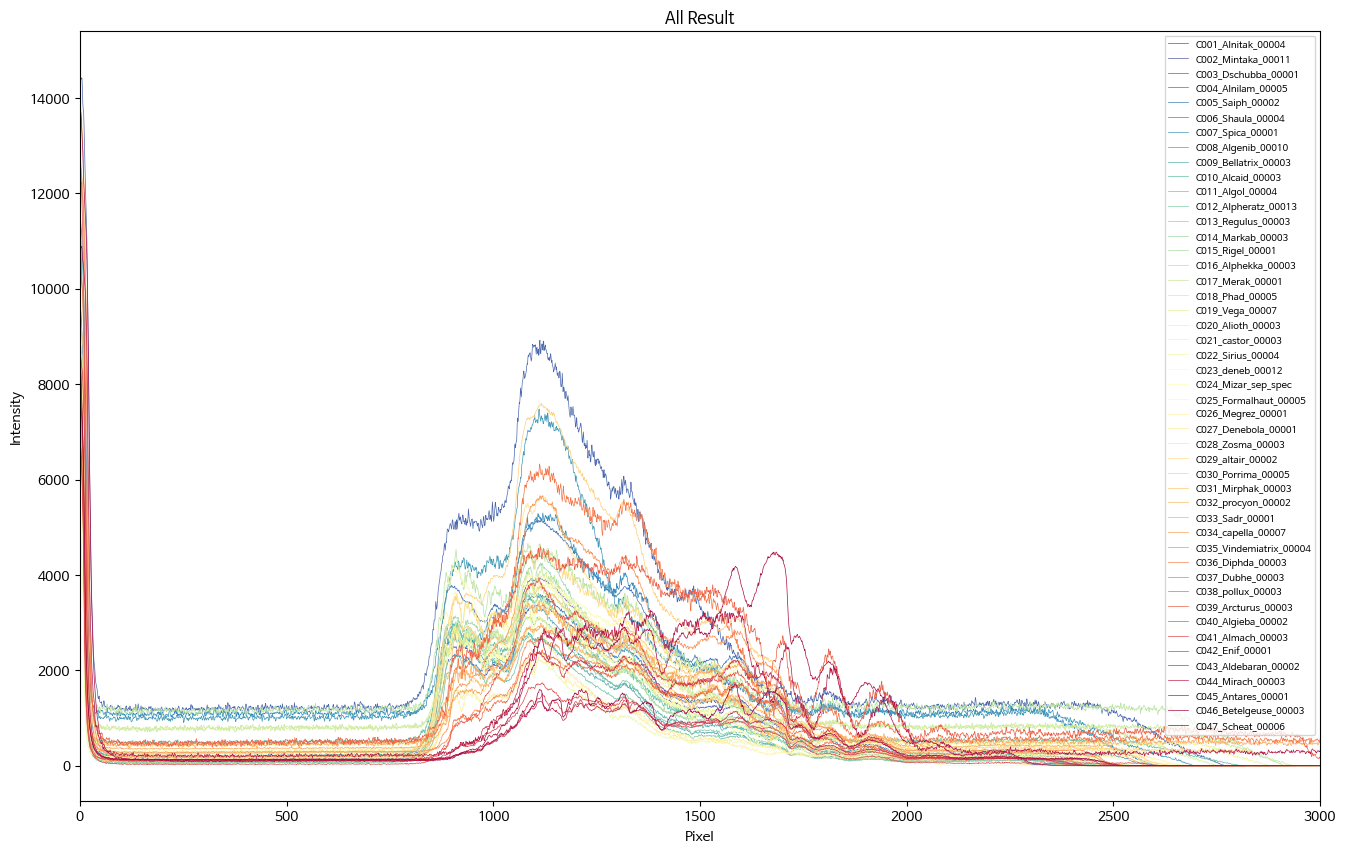

In [12]:
# reversed spectral colormap ("Spectral_r") 설정
cmap = plt.get_cmap("Spectral_r")
n_spectra = len(spectra)

plt.figure(figsize=(16, 10))
for i, (spec, name) in enumerate(zip(spectra, file_names)):
    x_axis = np.arange(len(spec))  # zero point 기준 x축
    # 색상 할당: 전체 스펙트럼 수에 따라 정규화된 값으로 colormap에서 색상 추출
    color = cmap(i / (n_spectra - 1)) if n_spectra > 1 else cmap(0.5)
    plt.plot(x_axis, spec, lw=0.5, color=color, label=name)
    
plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.title('All Result')
plt.xlim(0, max_length)
plt.grid(False)
plt.legend(fontsize='x-small')
plt.savefig('all_spectrum2.png')
plt.show()

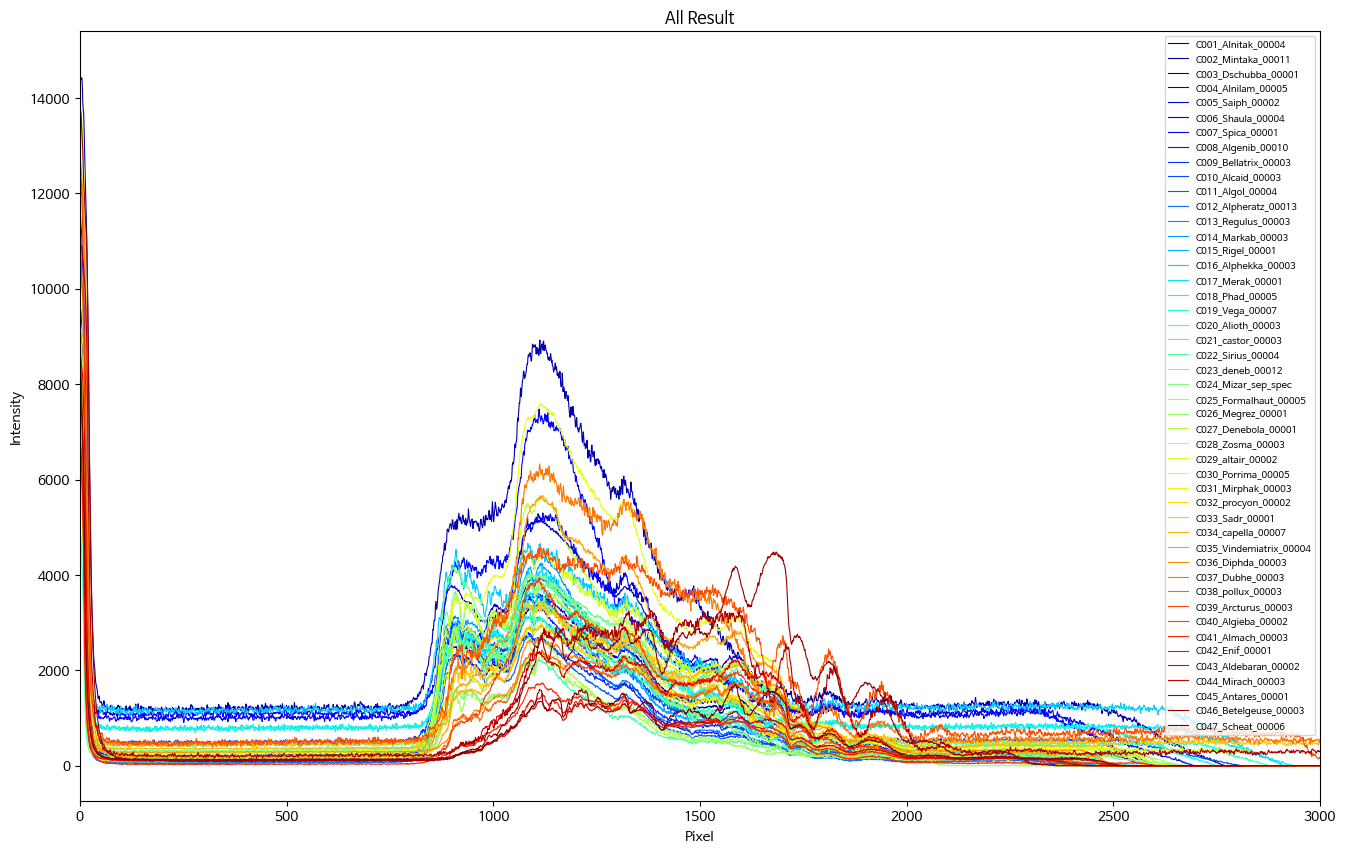

In [13]:
# reversed spectral colormap ("Spectral_r") 설정
cmap = plt.get_cmap("jet")
n_spectra = len(spectra)

plt.figure(figsize=(16, 10))
for i, (spec, name) in enumerate(zip(spectra, file_names)):
    x_axis = np.arange(len(spec))  # zero point 기준 x축
    # 색상 할당: 전체 스펙트럼 수에 따라 정규화된 값으로 colormap에서 색상 추출
    color = cmap(i / (n_spectra - 1)) if n_spectra > 1 else cmap(0.5)
    plt.plot(x_axis, spec, lw=0.8, color=color, label=name)
    
plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.title('All Result')
plt.xlim(0, max_length)
plt.grid(False)
plt.legend(fontsize='x-small')
plt.savefig('all_spectrum3.png')
plt.show()

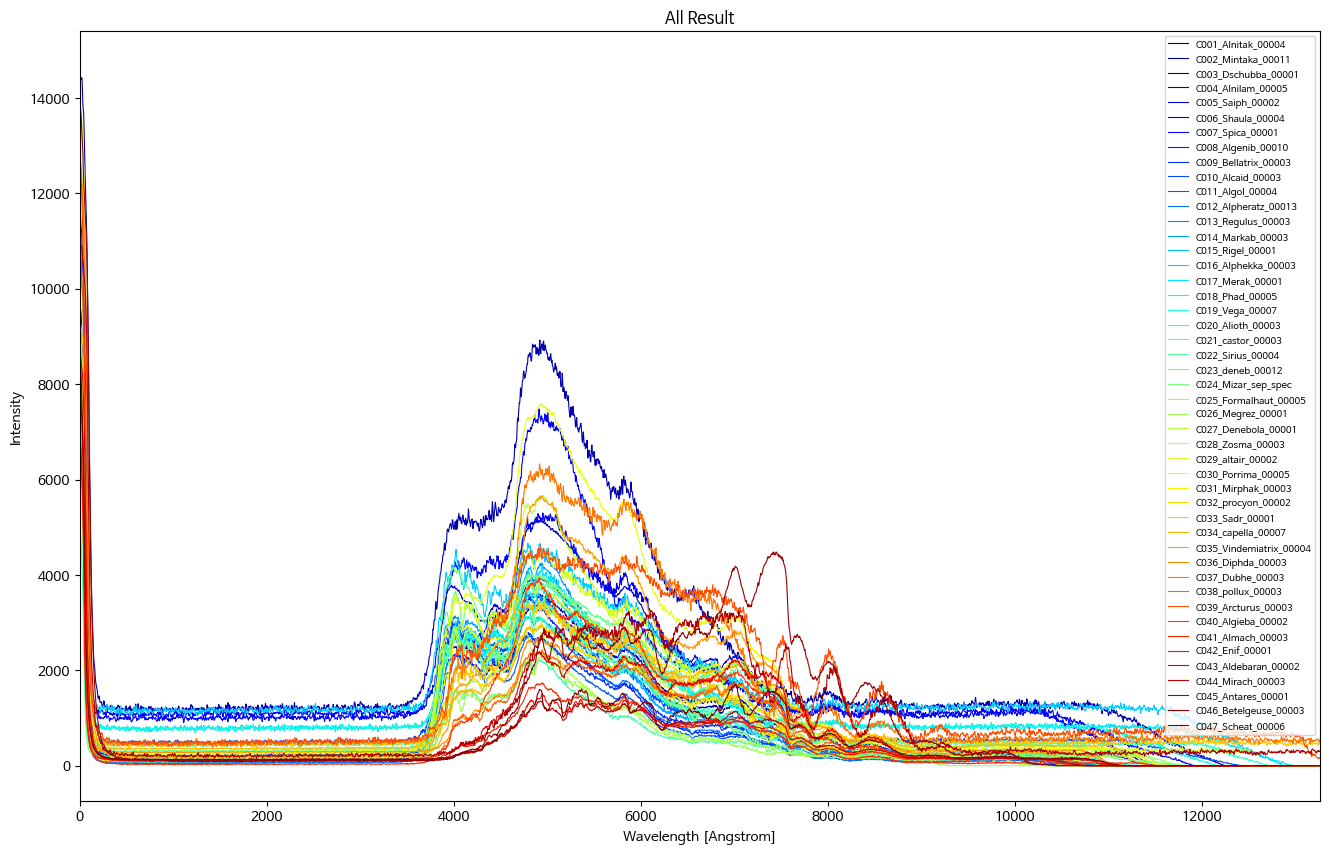

In [14]:
conversion_factor = 4.42

# reversed spectral colormap ("Spectral_r") 설정
cmap = plt.get_cmap("jet")
n_spectra = len(spectra)

plt.figure(figsize=(16, 10))
for i, (spec, name) in enumerate(zip(spectra, file_names)):
    x_axis = np.arange(len(spec))  # zero point 기준 x축
    # 색상 할당: 전체 스펙트럼 수에 따라 정규화된 값으로 colormap에서 색상 추출
    color = cmap(i / (n_spectra - 1)) if n_spectra > 1 else cmap(0.5)
    x_axis_angstrom = np.arange(len(spec)) * conversion_factor
    plt.plot(x_axis_angstrom, spec, lw=0.8, color=color, label=name)
    
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Intensity')
plt.title('All Result')
plt.xlim(0, max_length * conversion_factor)
plt.grid(False)
plt.legend(fontsize='x-small')
plt.savefig('all_spectrum4.png')
plt.show()

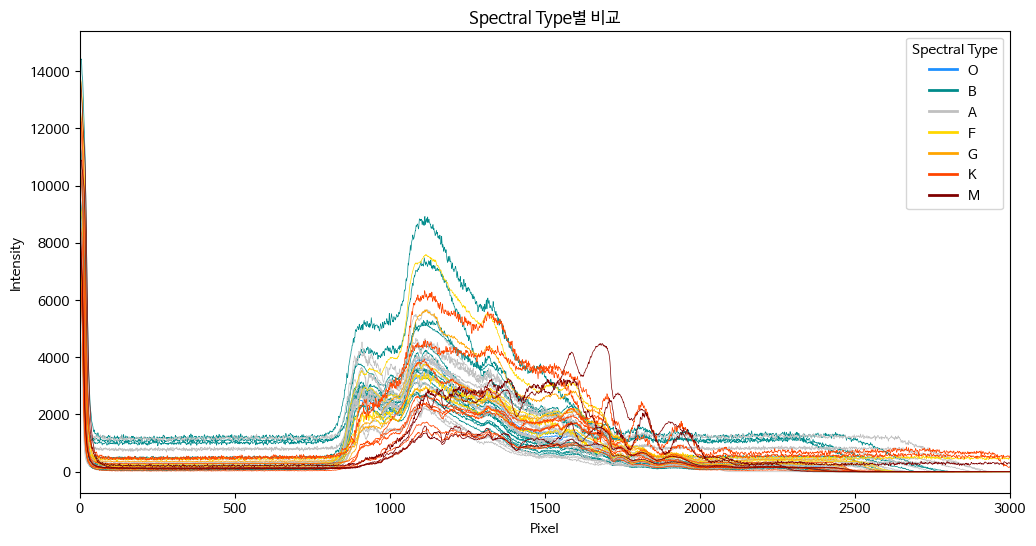

In [15]:
import glob
import os
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# 1. CSV 파일에서 spectral type 정보 읽기
df = pd.read_csv("spectral_type.csv")
spectral_type_dict = dict(zip(df['filename'], df['spectral_type']))

# 2. 고정 spectral order와 지정 색상 설정
spectral_order = ["O", "B", "A", "F", "G", "K", "M"]
color_list = ["dodgerblue", "darkcyan", "silver", "gold", "orange", "orangered", "maroon"]
color_mapping = dict(zip(spectral_order, color_list))

# 3. spec_fits 폴더 내의 .fit 파일 목록 불러오기
fit_files = glob.glob('spec_fits/*.fit')

# 4. 각 FITS 파일의 zero point(최대값) 이후 데이터 추출
spectrum_zero_list = []
file_names = []
for file in fit_files:
    with fits.open(file) as hdul:
        data = hdul[0].data
        if data is None:
            print(f"{file} 파일에 데이터가 없습니다.")
        else:
            max_idx = np.argmax(data)  # 최대값 인덱스를 zero point로 간주
            spectrum_zero = data[max_idx:]
            spectrum_zero_list.append(spectrum_zero)
            file_names.append(os.path.basename(file))

# 5. 모든 스펙트럼의 x축 범위를 동일하게 설정하기 위해 최대 길이 계산
# max_length = max(len(s) for s in spectrum_zero_list)
max_length = 3000


# 6. 하나의 plot에 모든 스펙트럼을 그리기 (line width 0.5)
plt.figure(figsize=(12, 6))
# spectral type별 legend handle을 저장할 딕셔너리 (고정 순서에 따라 초기화)
legend_handles = {st: None for st in spectral_order}

for spectrum, file_name in zip(spectrum_zero_list, file_names):
    # CSV 정보를 이용해 해당 파일의 spectral type 조회 (없으면 'Unknown' 처리)
    stype = spectral_type_dict.get(file_name, "Unknown")
    # spectral type이 지정되어 있으면 해당 색상, 아니면 기본 'black'
    color = color_mapping.get(stype, 'black')
    
    x_axis = np.arange(len(spectrum))
    plt.plot(x_axis, spectrum, lw=0.5, color=color)
    
    # legend handle이 아직 생성되지 않은 경우에 한해 생성
    if stype in legend_handles and legend_handles[stype] is None:
        legend_handles[stype] = Line2D([0], [0], color=color, lw=2, label=stype)

plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.title('Spectral Type별 비교')
plt.xlim(0, max_length)
plt.grid(False)

# spectral_order 순서대로 legend handle을 모아서 legend 생성
ordered_handles = [legend_handles[st] for st in spectral_order if legend_handles[st] is not None]
plt.legend(handles=ordered_handles, title="Spectral Type")
plt.savefig('all_spectrum_as_type.png')
plt.show()


In [16]:
# spec_fits 폴더 내의 .fit 파일 목록 불러오기
fit_files = glob.glob('spec_fits/*.fit')

# spectral type별로 데이터를 그룹화
# 각 그룹은 spectral type에 해당하는 (spectrum, file_name) 튜플의 리스트입니다.
grouped_data = {stype: [] for stype in spectral_order}

for file in fit_files:
    file_name = os.path.basename(file)
    with fits.open(file) as hdul:
        data = hdul[0].data
        if data is None:
            print(f"{file} 파일에 데이터가 없습니다.")
            continue
        # 최대값 인덱스를 zero point로 간주하고 이후 데이터 추출
        max_idx = np.argmax(data)
        spectrum_zero = data[max_idx:]
    # CSV에 저장된 spectral type 정보를 사용 
    stype = spectral_type_dict.get(file_name)
    if stype in grouped_data:
        grouped_data[stype].append((spectrum_zero, file_name))
    else:
        print(f"{file_name} 의 spectral type '{stype}' 는 지정된 그룹에 포함되지 않습니다.")

# 결과 저장 디렉토리 생성
output_dir = 'spec_graph_by_type'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 각 spectral type 그룹 별로 그래프 그리기
for stype in spectral_order:
    group = grouped_data[stype]
    if not group:
        print(f"{stype} 그룹에 데이터가 없습니다.")
        continue
    # 그룹 내 스펙트럼의 최대 길이를 계산하여 x축 범위 결정
    max_length = 3000
    
    plt.figure(figsize=(12, 6))
    # 지정된 색상 사용 (해당 spectral type)
    color = color_mapping[stype]
    for spectrum, file_name in group:
        x_axis = np.arange(len(spectrum))
        plt.plot(x_axis, spectrum, lw=0.7, color=color)
    
    plt.xlabel('Pixel')
    plt.ylabel('Intensity')
    plt.title(f"{stype}형 수집 결과")
    plt.xlim(0, max_length)
    plt.grid(False)
    
    # 결과를 PNG 파일로 저장 (예: O_spectra.png)
    output_path = os.path.join(output_dir, f"{stype}_spectra.png")
    plt.savefig(output_path)
    plt.close()
    print(f"{stype}형 스펙트럼 그래프 저장됨: {output_path}")


O형 스펙트럼 그래프 저장됨: spec_graph_by_type\O_spectra.png
B형 스펙트럼 그래프 저장됨: spec_graph_by_type\B_spectra.png
A형 스펙트럼 그래프 저장됨: spec_graph_by_type\A_spectra.png
F형 스펙트럼 그래프 저장됨: spec_graph_by_type\F_spectra.png
G형 스펙트럼 그래프 저장됨: spec_graph_by_type\G_spectra.png
K형 스펙트럼 그래프 저장됨: spec_graph_by_type\K_spectra.png
M형 스펙트럼 그래프 저장됨: spec_graph_by_type\M_spectra.png


## 4. Angstrom 단위로 변환

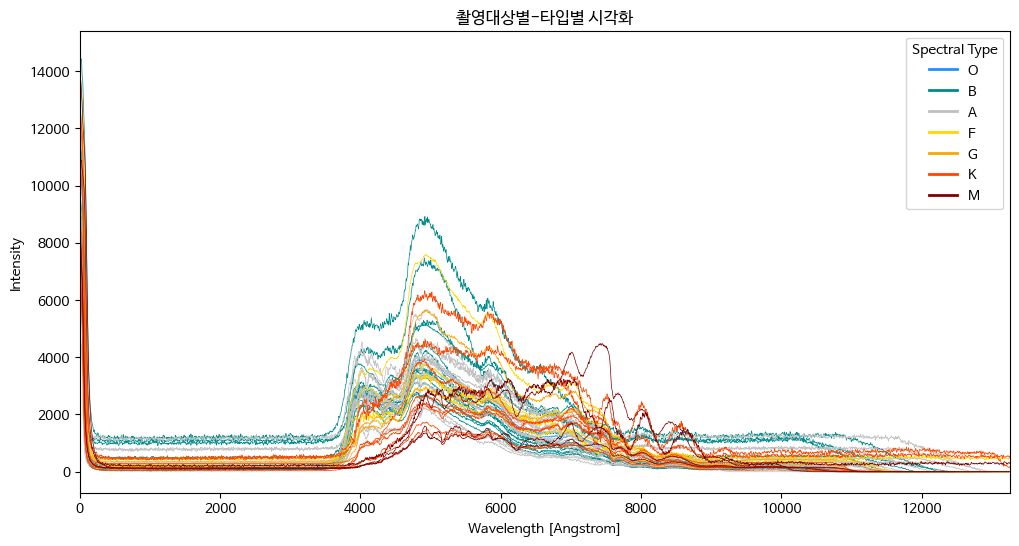

In [17]:
# 변환 계수 설정: x축의 1 단위가 4.42 Å에 해당
conversion_factor = 4.42

# 하나의 plot에 모든 스펙트럼을 그리기 (line width 0.5)
plt.figure(figsize=(12, 6))
legend_handles = {st: None for st in spectral_order}

for spectrum, file_name in zip(spectrum_zero_list, file_names):
    stype = spectral_type_dict.get(file_name, "Unknown")
    color = color_mapping.get(stype, 'black')
    
    # x축을 Angstrom 단위로 변환 (zero point부터 시작)
    x_axis_angstrom = np.arange(len(spectrum)) * conversion_factor
    plt.plot(x_axis_angstrom, spectrum, lw=0.5, color=color)
    
    # legend handle 생성 (중복 없이)
    if stype in legend_handles and legend_handles[stype] is None:
        legend_handles[stype] = Line2D([0], [0], color=color, lw=2, label=stype)

plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Intensity')
plt.title('촬영대상별-타입별 시각화')
plt.xlim(0, max_length * conversion_factor)
plt.grid(False)

ordered_handles = [legend_handles[st] for st in spectral_order if legend_handles[st] is not None]
plt.legend(handles=ordered_handles, title="Spectral Type")
plt.savefig('all_spectrum_as_type_wave.png')
plt.show()


In [18]:
# 결과 저장 디렉토리 생성
output_dir = 'spec_graph_by_type_2'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 각 spectral type 그룹별로 그래프 그리기
for stype in spectral_order:
    group = grouped_data[stype]
    if not group:
        print(f"{stype} 그룹에 데이터가 없습니다.")
        continue
    # 그룹 내 스펙트럼의 최대 길이를 계산하여 x축 범위 결정
    max_length = 3000
    
    plt.figure(figsize=(12, 6))
    # 지정된 색상 사용 (해당 spectral type)
    color = color_mapping[stype]
    for spectrum, file_name in group:
        x_axis_angstrom = np.arange(len(spectrum)) * conversion_factor
        plt.plot(x_axis_angstrom, spectrum, lw=0.7, color=color)
    
    plt.xlabel('Wavelength [Angstrom]')
    plt.ylabel('Intensity')
    plt.title(f"{stype}형 수집 결과")
    plt.xlim(0, max_length*conversion_factor)
    plt.grid(False)
    
    # 결과를 PNG 파일로 저장 (예: O_type_spec_rst.png)
    output_path = os.path.join(output_dir, f"{stype}_type_spec_rst.png")
    plt.savefig(output_path)
    plt.close()
    print(f"{stype}형 스펙트럼 그래프 저장됨: {output_path}")


O형 스펙트럼 그래프 저장됨: spec_graph_by_type_2\O_type_spec_rst.png
B형 스펙트럼 그래프 저장됨: spec_graph_by_type_2\B_type_spec_rst.png
A형 스펙트럼 그래프 저장됨: spec_graph_by_type_2\A_type_spec_rst.png
F형 스펙트럼 그래프 저장됨: spec_graph_by_type_2\F_type_spec_rst.png
G형 스펙트럼 그래프 저장됨: spec_graph_by_type_2\G_type_spec_rst.png
K형 스펙트럼 그래프 저장됨: spec_graph_by_type_2\K_type_spec_rst.png
M형 스펙트럼 그래프 저장됨: spec_graph_by_type_2\M_type_spec_rst.png


In [19]:
# 결과 저장 디렉토리 생성
output_dir = 'spec_graph_zero_xlim_3'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


# 각 spectral type 그룹별로 그래프 그리기
for stype in spectral_order:
    group = grouped_data[stype]
    if not group:
        print(f"{stype} 그룹에 데이터가 없습니다.")
        continue
    # 그룹 내 스펙트럼의 최대 길이를 계산하여 x축 범위 결정
    max_length = 3000
    
    # plt.figure(figsize=(12, 6))
    # 지정된 색상 사용 (해당 spectral type)
    color = color_mapping[stype]

    for spectrum, file_name in zip(spectrum_zero_list, file_names):
        stype = spectral_type_dict.get(file_name, "Unknown")
        color = color_mapping.get(stype, 'black')
    
        # x축을 Angstrom 단위로 변환 
        x_axis_angstrom = np.arange(len(spectrum)) * conversion_factor

        # 파일명에서 확장자 제거 후 png 파일로 저장
        base_name = os.path.splitext(file_name)[0]
        
        # 저장 경로 설정
        output_path = os.path.join(output_dir, f"{base_name}.png")
        
        plt.figure(figsize=(12, 6))
        plt.plot(x_axis_angstrom, spectrum, lw=0.9, color=color)
        plt.xlabel('Wavelength [Angstrom]')
        plt.ylabel('Intensity')
        plt.title(f"{base_name} 스펙트럼 ")
        plt.xlim(0, max_length * conversion_factor)
        plt.grid(False)
        plt.legend(handles=ordered_handles, title="Spectral Type")
        plt.savefig(output_path)
        plt.close()